In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
file_nse1 = "benchmark_2024-04-04_14-21-34_nse1.csv"
file_nse2 = "benchmark_2024-04-04_14-25-01_nse2.csv"
file_nse3 = "benchmark_2024-04-04_14-27-58_nse3.csv"
df_nse1 = pd.read_csv(file_nse1, sep=",")
df_nse2 = pd.read_csv(file_nse2, sep=",")
df_nse3 = pd.read_csv(file_nse3, sep=",")

In [3]:
# Entferne die Klammern und konvertiere den Wert in einen float
# Klammern entfernen und versuchen, die Werte in float umzuwandeln
df_nse1['Best Residuum'] = df_nse1['Best Residuum'].str.replace('[', '').str.replace(']', '').astype(float)
df_nse1

,Epochs,Time,Best Action,Best Residuum
0,1000.0,3.507,[0.00049217],9.686716e-07
1,5000.0,15.117,[0.00012382],6.132296e-08
2,10000.0,32.300,[-9.26498324e-05],3.433756e-08
3,50000.0,503.706,[-2.28732824e-05],2.092772e-09


In [4]:
df_nse2

,Epochs,Time,Best Action,Best Residuum,Best Action global optimum,Best Residuum global optimum
0,1000.0,3.082,[0.2542685 0.13912988],9.166506e-07,[0.97511494 1.04273069],0.049449
1,5000.0,9.810,[-1.07163441 1.35560369],1.595296e-07,[0.98484522 0.99938327],0.015167
2,10000.0,17.574,[0.77991146 0.62997615],8.677965e-06,[0.97747838 1.0144397 ],0.026753
3,50000.0,92.991,[-0.09056232 0.11724898],7.715800e-09,[1.00248635 1.01121473],0.011487


In [5]:
df_nse3

,Epochs,Time,Best Action,Best Residuum,Best Action global optimum,Best Residuum global optimum
0,1000.0,3.181,[-0.31096017 -0.49408755 1.79192293 0.516769...,0.129272,[-1.46956313 0.50317448 1.23750794 0.821623...,0.924550
1,5000.0,9.702,[-0.48311168 0.29923525 0.6719203 -0.183016...,0.065153,[-0.57029372 0.75875348 1.03696442 0.763609...,0.909364
2,10000.0,17.513,[-0.97446001 -0.33348921 -0.87956125 -1.034667...,0.017688,[-1.04677093 0.05005951 1.2746861 0.703390...,1.143992
3,50000.0,102.152,[ 0.01506184 1.13049495 -0.49806625 1.159051...,0.007106,[-1.23441792 0.33613533 1.11675096 0.167582...,0.691754


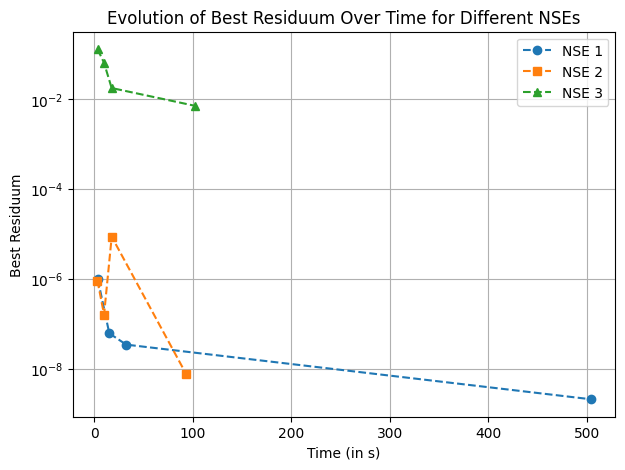

In [6]:
# Daten aus dem ersten DataFrame extrahieren
time_bestres_nse1 = df_nse1[["Time", "Best Residuum"]]
time_nse1 = time_bestres_nse1["Time"]
best_res_nse1 = time_bestres_nse1["Best Residuum"]

# Daten aus dem zweiten DataFrame extrahieren
time_bestres_nse2 = df_nse2[["Time", "Best Residuum"]]
time_nse2 = time_bestres_nse2["Time"]
best_res_nse2 = time_bestres_nse2["Best Residuum"]

# Daten aus dem dritten DataFrame extrahieren
time_bestres_nse3 = df_nse3[["Time", "Best Residuum"]]
time_nse3 = time_bestres_nse3["Time"]
best_res_nse3 = time_bestres_nse3["Best Residuum"]

# Größe festlegen
plt.figure(figsize=(7,5))

# Plot erstellen
plt.plot(time_nse1, best_res_nse1, "o", label="NSE 1", linestyle="--")
plt.plot(time_nse2, best_res_nse2, "s", label="NSE 2", linestyle="--")
plt.plot(time_nse3, best_res_nse3, "^", label="NSE 3", linestyle="--")

# Plot beschriften und anzeigen
plt.xlabel("Time (in s)")
plt.ylabel("Best Residuum")
plt.grid()
plt.yscale("log")
plt.legend()
plt.title("Evolution of Best Residuum Over Time for Different NSEs")
plt.show()

In [7]:
def linear_relationship(dataframe):
    """
    Berechnet den linearen Zusammenhang zwischen Zeit und Epochen für einen DataFrame.

    Args:
    dataframe (pd.DataFrame): Ein DataFrame mit den Spalten 'Time' und 'Epochs'.

    Returns:
    dict: Ein Dictionary mit den Ergebnissen des linearen Zusammenhangs.
          Enthält die Slope, Intercept, Korrelationskoeffizient (r), P-Wert und Standardfehler.
    """

    results = {}

    try:
        # Berechne den linearen Zusammenhang
        slope, intercept, r_value, p_value, std_err = linregress(dataframe["Time"], dataframe["Epochs"])

        # Speichere die Ergebnisse in einem Dictionary
        results["Slope"] = slope
        results["Intercept"] = intercept
        results["Korrelationskoeffizient (r)"] = r_value
        results["P-Wert"] = p_value
        results["Standardfehler"] = std_err

    except Exception as e:
        # Fangen Sie alle Fehler ab und geben Sie eine Fehlermeldung aus
        results["Error"] = str(e)

    return results

In [8]:
# Beispielaufruf für DataFrame df_nse1
results_nse1 = linear_relationship(df_nse1)
print("Ergebnisse für DataFrame df_nse1:")
print(results_nse1)
print("---"*50)

# Beispielaufruf für DataFrame df_nse2
results_nse2 = linear_relationship(df_nse2)
print("Ergebnisse für DataFrame df_nse2:")
print(results_nse2)
print("---"*50)

# Beispielaufruf für DataFrame df_nse1
results_nse3 = linear_relationship(df_nse3)
print("Ergebnisse für DataFrame df_nse3:")
print(results_nse3)

Ergebnisse für DataFrame df_nse1:
{'Slope': 92.28509287397215, 'Intercept': 3703.9797348272077, 'Korrelationskoeffizient (r)': 0.9934062081311444, 'P-Wert': 0.006593791868855559, 'Standardfehler': 7.5310443755257035}
------------------------------------------------------------------------------------------------------------------------------------------------------
Ergebnisse für DataFrame df_nse2:
{'Slope': 540.8706502968778, 'Intercept': -193.56696842540987, 'Korrelationskoeffizient (r)': 0.9997654210863085, 'P-Wert': 0.0002345789136914967, 'Standardfehler': 8.285416000702838}
------------------------------------------------------------------------------------------------------------------------------------------------------
Ergebnisse für DataFrame df_nse3:
{'Slope': 487.68289834818745, 'Intercept': 339.65179743611225, 'Korrelationskoeffizient (r)': 0.9993240763522319, 'P-Wert': 0.0006759236477681394, 'Standardfehler': 12.68547097925416}


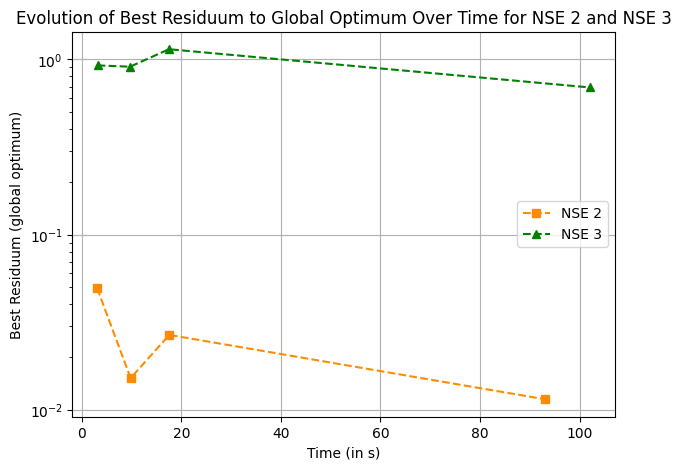

In [9]:
# plot best residuum global optimum
best_res_opt_nse2 = df_nse2[["Best Residuum global optimum"]]
best_res_opt_nse3 = df_nse3[["Best Residuum global optimum"]]

# Größe festlegen
plt.figure(figsize=(7,5))

#plt.plot(time_nse1, best_res_nse1, "o", label="NSE 1", linestyle="--")
plt.plot(time_nse2, best_res_opt_nse2, "s", label="NSE 2", linestyle="--", color="darkorange")
plt.plot(time_nse3, best_res_opt_nse3, "^", label="NSE 3", linestyle="--", color="green")

# Plot beschriften und anzeigen
plt.xlabel("Time (in s)")
plt.ylabel("Best Residuum (global optimum)")
plt.grid()
plt.yscale("log")
plt.legend()
plt.title("Evolution of Best Residuum to Global Optimum Over Time for NSE 2 and NSE 3")
plt.show()

In [19]:
file_newton_nse1 = "benchmark_newton_results_nse1.csv"
file_newton_nse2 = "benchmark_newton_results_nse2.csv"
df_newton_nse1 = pd.read_csv(file_newton_nse1, sep=",")
df_newton_nse2 = pd.read_csv(file_newton_nse2, sep=",")

desired_precision = 30

def format_float(val):
    return f'{val:.{desired_precision}f}'

# Setze die Anzeigeoption für Floats
pd.options.display.float_format = format_float

In [20]:
df_newton_nse1

,Steps,x0,Solution,Num Iter,Tolerance,Time
0,5,5.000000000000000000000000000000,2.577732240960886489489212181070,4,0.191982229680333293941885131062,0.005001306533813400234667057020
1,10,5.000000000000000000000000000000,2.493695549112565412741560066934,9,0.000000000000007105427357601002,0.006999969482421800406890532997
2,15,5.000000000000000000000000000000,2.493695549112564968652350216871,14,0.000000000000000000000000000000,0.009998083114623999151371336325
3,20,5.000000000000000000000000000000,2.493695549112564968652350216871,19,0.000000000000000000000000000000,0.012999296188354400247155773229


In [16]:
df_newton_nse2

,Steps,x0,Solution,Num Iter,Tolerance,Time
0,5,[-5. 5.],[1. 1.],5,0.000000000000000,0.004000186920166
1,10,[-5. 5.],[1. 1.],10,0.000000000000000,0.005999803543091
2,15,[-5. 5.],[1. 1.],15,0.000000000000000,0.007999897003174
3,20,[-5. 5.],[1. 1.],20,0.000000000000000,0.010999679565430
